# TASK 7

Registration ID : SIRSS2140

RAJ SANKAR GS

# Q1. Implement gradient descent (for simple linear regression) from scratch.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

# Sepal Length vs Sepal Width of IRIS Setosa

In [5]:
df.sepal_length.corr(df.sepal_width)

-0.11756978413300208

In [6]:
#taking only first 50 columns of Iris-setosa species
m,n=df.shape
X=df.sepal_length.iloc[0:120].values.reshape(120,1)
Y=df.sepal_width.iloc[0:120].values.reshape(120,1)

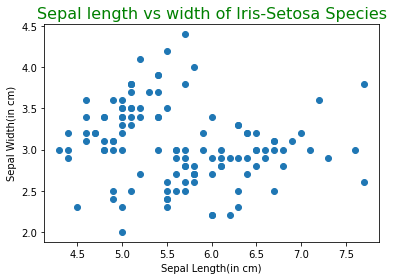

In [7]:
plt.scatter(X,Y)
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

# Without Gradient Descent

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [9]:
# Create linear regression model
regr = linear_model.LinearRegression()

In [10]:
# Train the model using the training sets
regr.fit(X,Y)

LinearRegression()

In [11]:
# The coefficients
print('Coefficients: ', regr.coef_)
# Intercept
print('Intercept: ', regr.intercept_)

#or # The coefficients
#print('Coefficients: \n', regr.coef_)
# Intercept
#print('Intercept: \n', regr.intercept_)

Coefficients:  [[-0.09583906]]
Intercept:  [3.61089698]


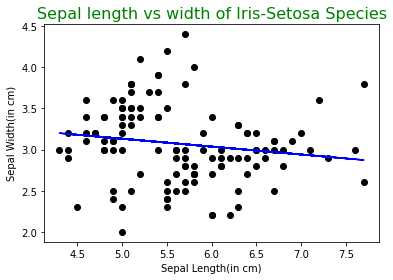

In [12]:
#Plotting Regression Line Against True Labels
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-b')
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

In [13]:
#Evaluate Model

# The mean squared error

print("Mean squared error (Test Dataset): %f" %mean_squared_error(Y,X))



Mean squared error (Test Dataset): 7.592833


# With Gradient Descent

In [14]:
iterations = 100

def gradient_descent(x,y):
    m_curr = b_curr = 0
    n = len(x)
    learning_rate = 0.02
    m = []
    b = []
    cost_func = []
    
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum((y - y_predicted)**2)
        md = -(2/n) * sum(x*(y- y_predicted))
        bd = -(2/n) * sum(y- y_predicted)
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd
        print("i = {}, m = {}, b = {}, cost = {}".format(i, m_curr, b_curr, cost))
        m.append(m_curr)
        b.append(b_curr)
        cost_func.append(cost)
    return m, b, cost_func

In [15]:
m, b, cost_func = gradient_descent(X, Y)

i = 0, m = [0.69168], b = [0.12276667], cost = [9.63691667]
i = 1, m = [0.45531407], b = [0.08423382], cost = [1.50509807]
i = 2, m = [0.53531353], b = [0.10068462], cost = [0.55983331]
i = 3, m = [0.50746643], b = [0.09838951], cost = [0.44970749]
i = 4, m = [0.51638395], b = [0.10248244], cost = [0.4366323]
i = 5, m = [0.51276904], b = [0.1043954], cost = [0.43483561]
i = 6, m = [0.51342677], b = [0.10704917], cost = [0.43434996]
i = 7, m = [0.51262838], b = [0.10944808], cost = [0.43401706]
i = 8, m = [0.51232678], b = [0.11193154], cost = [0.43370229]
i = 9, m = [0.51185623], b = [0.11438386], cost = [0.43339002]
i = 10, m = [0.51144368], b = [0.11684448], cost = [0.43307843]
i = 11, m = [0.51101175], b = [0.11929995], cost = [0.43276731]
i = 12, m = [0.51058684], b = [0.12175487], cost = [0.43245662]
i = 13, m = [0.51015994], b = [0.12420765], cost = [0.43214637]
i = 14, m = [0.50973411], b = [0.12665885], cost = [0.43183656]
i = 15, m = [0.50930832], b = [0.12910828], cost = [0.4

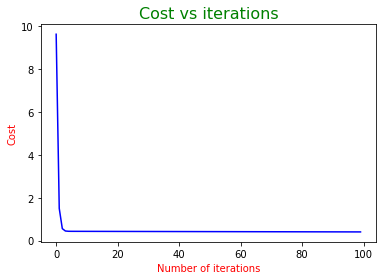

In [16]:
plt.plot(np.arange(iterations),cost_func, color='b')
plt.xlabel('Number of iterations',color='red')
plt.ylabel('Cost',color='red')
plt.title('Cost vs iterations',color='green',fontsize=16)
plt.show()

In [17]:
print("Mean squared error (Test Dataset): %f" %mean_squared_error(m[-1]*X + b[-1],X))

Mean squared error (Test Dataset): 7.137604


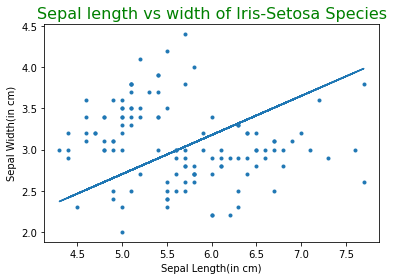

In [18]:
plt.scatter(X,Y,marker='.')
plt.plot(X,(m[-1]*X + b[-1]))
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

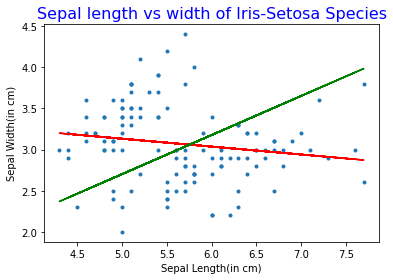

In [19]:
plt.scatter(X,Y,marker='.')
# Without Gradient Descent
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-r')

# With Gradient Descent
plt.plot(X,m[-1]*X + b[-1],'g')

plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='b',fontsize=16)
plt.show()